# Importing Modules

In [103]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler    
from sklearn.decomposition import PCA
import pickle

In [57]:
import pandas as pd
import numpy as np

churn_data = pd.read_excel("./Data/customer_churn_large_dataset.xlsx")
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data PreProcessing

In [58]:
churn_data.dropna()
churn_data.drop("Name" , axis = 1 , inplace= True)
churn_data.drop("CustomerID" , axis = 1 , inplace= True)

#Vectorizing Genders

churn_data["Gender"] = churn_data["Gender"].apply(lambda g: 1 if g=="Male" else 0)

#Vectorizing Cities

locations = list(churn_data["Location"].unique())
churn_data["Location"] = churn_data["Location"].apply(lambda x: locations.index(x)+1)
# churn_data = pd.get_dummies(churn_data,columns=["Location"], prefix='',prefix_sep='')

churn_data.head(10)


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,1,17,73.36,236,0
1,62,0,2,1,48.76,172,0
2,24,0,1,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
5,67,1,2,15,82.65,456,1
6,30,0,4,3,73.79,269,0
7,67,0,3,1,97.70,396,1
8,20,0,3,10,42.45,150,1
9,53,0,1,12,64.49,383,1


In [59]:
# churn_data["val2money"] = (churn_data["Subscription_Length_Months"] * churn_data["Total_Usage_GB"]) / churn_data["Monthly_Bill"]
# churn_data["val2money"] = (churn_data["Monthly_Bill"] * (churn_data["Location"] + churn_data["Age"]/10) )
churn_data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,1,17,73.36,236,0
1,62,0,2,1,48.76,172,0
2,24,0,1,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


In [60]:

# churn_data = churn_data.loc[:,["Age","Gender","Los Angeles","Chicago","Houston","Miami","New York","Monthly_Bill","Subscription_Length_Months","Total_Usage_GB","Churn"]]
churn_data = churn_data.loc[:,["Age","Gender","Location","Monthly_Bill","Subscription_Length_Months","Total_Usage_GB","Churn"]]

# for city in locations:
#     churn_data[city] = (churn_data[city] == True).astype(int)

churn_data.head()

,Age,Gender,Location,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
0,63,1,1,73.36,17,236,0
1,62,0,2,48.76,1,172,0
2,24,0,1,85.47,5,460,0
3,36,0,3,97.94,3,297,1
4,46,0,3,58.14,19,266,0


# Data Correlation
 

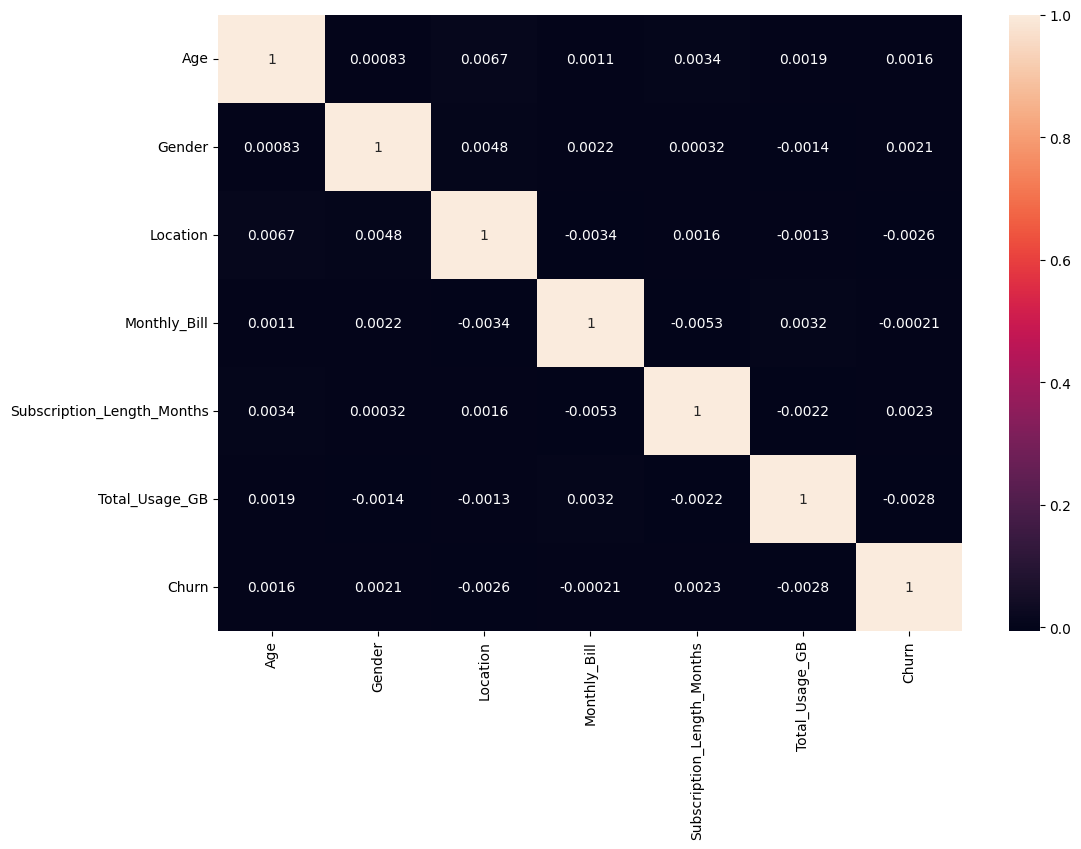

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn

corr = churn_data.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corr,annot=True,fmt=".2g")

plt.show()

array([[<Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Gender'>,
        <Axes: xlabel='Churn', ylabel='Gender'>],
       [<Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Age'>,
        <Axes: xlabel='Churn', ylabel='Age'>],
       [<Axes: xlabel='Gender', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Age', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Churn', ylabel='Total_Usage_GB'>],
       [<Axes: xlabel='Gender', ylabel='Churn'>,
        <Axes: xlabel='Age', ylabel='Churn'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Churn'>,
        <Axes: xlabel='Churn', ylabel='Churn'>]], dtype=object)

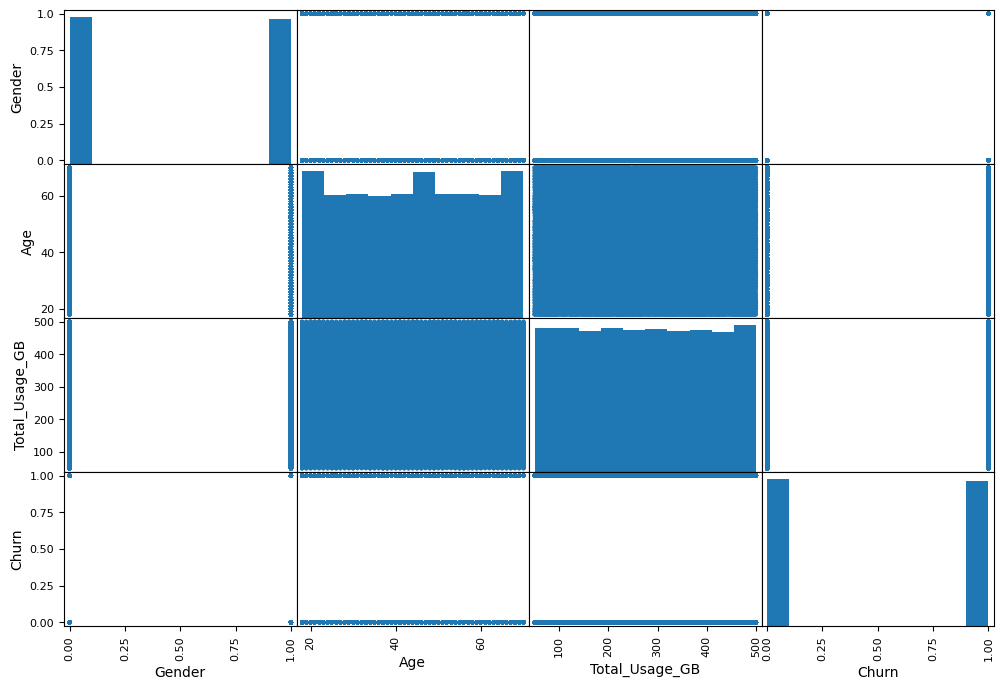

In [62]:
from pandas.plotting import scatter_matrix

attributes = ["Gender","Age","Total_Usage_GB","Churn"]

scatter_matrix(churn_data[attributes], figsize=(12,8))

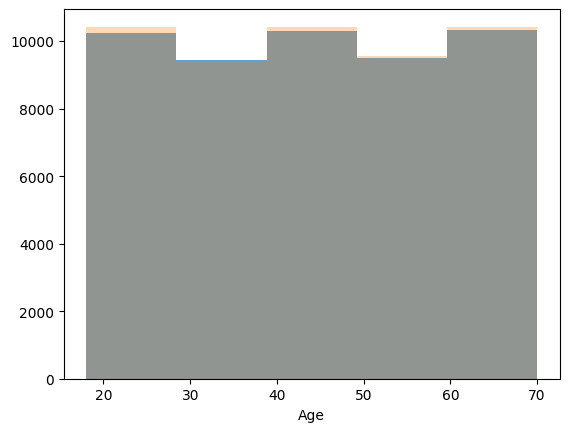

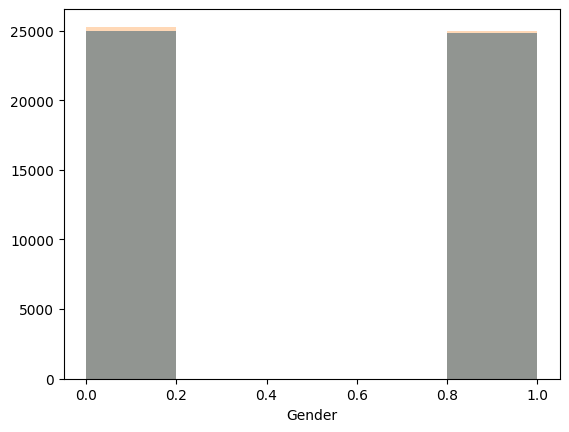

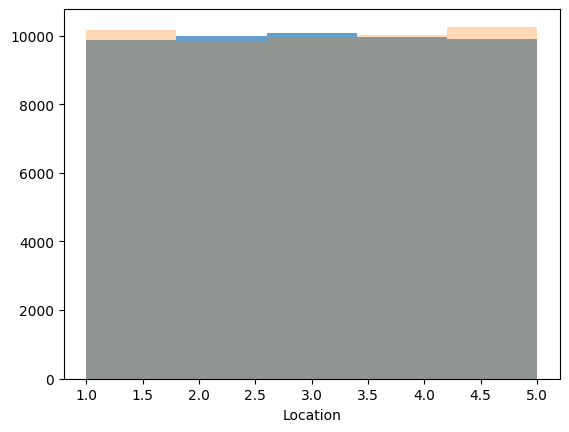

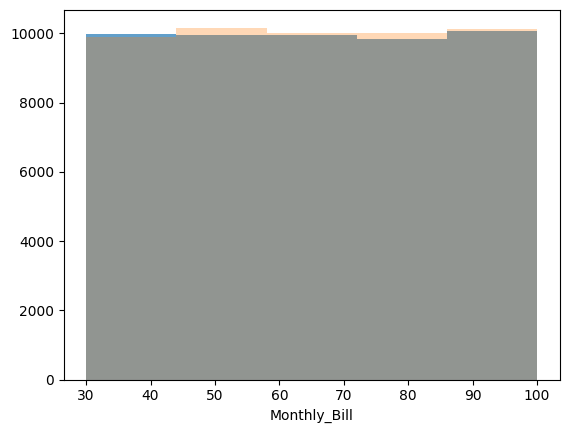

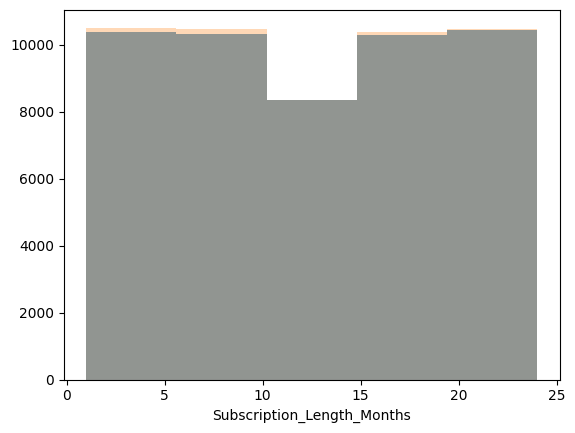

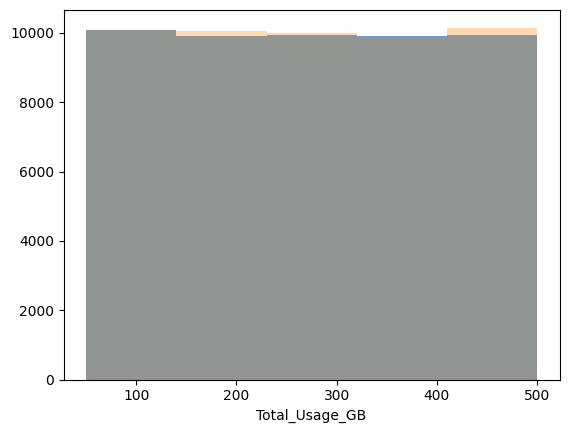

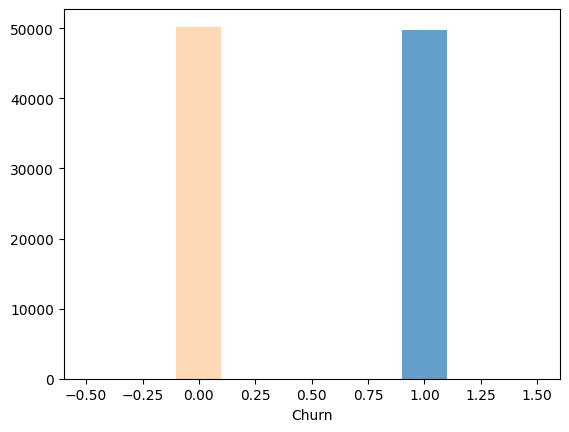

In [63]:
churn = churn_data[churn_data['Churn'] == 1]
no_churn = churn_data[churn_data['Churn'] == 0]

for col in churn_data:
    # Create histograms for Churn and No Churn
    plt.hist(churn[col], alpha=0.7, label='Churn', bins=5)
    plt.hist(no_churn[col], alpha=0.3, label='No Churn', bins=5)
    plt.xlabel(col)
    plt.show()


In [109]:
print(locations)

['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston']


# Training Validation And Test Datasets

In [138]:
churn_df = churn_data.sample(frac = 1)
train , test , valid = np.split(churn_df , [int(0.6*len(churn_df)), int(0.8*len(churn_df))])   

In [139]:
print(len(train))
train.head()

60000


,Age,Gender,Location,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
49619,33,0,5,92.73,24,167,1
3254,50,0,1,45.72,16,472,0
13438,30,1,4,46.99,7,207,0
68666,26,0,4,50.70,14,491,0
88527,39,1,3,82.42,14,384,0


In [140]:

print(len(test))
test.head()


20000


,Age,Gender,Location,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
32775,27,0,4,31.78,3,357,1
46758,54,0,4,34.42,7,301,0
10302,20,0,5,44.11,19,498,0
29928,65,1,3,90.68,11,390,0
10794,44,0,5,37.15,1,134,1


In [144]:
def scale_dataset(df,scaler,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    scaler.fit(x)
    X = scaler.transform(x)
    
    # pca = PCA(n_components=n)
    # pca.fit(X)

    # X = pca.transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X , y)

    data = np.hstack((X , np.reshape( y , (-1, 1))))

    return data , X , y

In [145]:
np.unique(train.columns[-1])
scaler = StandardScaler()

In [146]:
train , x_train , y_train = scale_dataset(train,scaler,oversample=False)
test , x_test , y_test = scale_dataset(test, scaler,oversample= False)
valid , x_valid , y_valid = scale_dataset(valid, scaler,oversample= False)

In [149]:
pickle.dump(scaler,open("./Models/scaler.pkl","wb"))

In [153]:
x_train[300]

array([-0.32956391, -0.99766938, -0.00442649, -1.62915556, -1.51104323,
       -0.60851322])

# Decison Tree



In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dctree = DecisionTreeClassifier()
dctree.fit(x_train,y_train)


DecisionTreeClassifier()

In [157]:
y_pred = dctree.predict(x_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      9934
           1       0.51      0.50      0.50     10066

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



In [156]:
pickle.dump(dctree, open('./Models/dctree_model.pkl','wb'))


# Logistic Regression Model

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [160]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46     10187
           1       0.49      0.56      0.52      9813

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



# Support Vector Machine

In [19]:
from sklearn.svm import SVC

In [338]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [358]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54     11718
           1       0.42      0.50      0.46      8282

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.52      0.50      0.51     20000



# Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)


RandomForestClassifier()

In [162]:
y_pred = rfc_model.predict(x_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52     10287
           1       0.49      0.49      0.49      9713

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Logistic Regression using Neural Networks


In [78]:
import tensorflow as tf

In [79]:
def plot_history(history):
  fig, (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10,4))
  ax1.plot( history.history['loss'], label = 'loss')
  ax1.plot( history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot( history.history['accuracy'], label = 'accuracy')
  ax2.plot( history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

In [99]:
def train_model(num_nodes, drop_prob, epochs, batch_size, lr):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(1,activation='sigmoid', input_shape = (6,))
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                                                      metrics= ['accuracy'])

  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid,y_valid)
  )

  return nn_model, history

Epoch 1/50
1875/1875 [==============================] - 2s 999us/step - loss: 0.7095 - accuracy: 0.4967 - val_loss: 0.7357 - val_accuracy: 0.5052
Epoch 2/50
1875/1875 [==============================] - 2s 938us/step - loss: 0.7070 - accuracy: 0.5033 - val_loss: 0.7078 - val_accuracy: 0.5005
Epoch 3/50
1875/1875 [==============================] - 2s 944us/step - loss: 0.7089 - accuracy: 0.4956 - val_loss: 0.6986 - val_accuracy: 0.5032
Epoch 4/50
1875/1875 [==============================] - 2s 940us/step - loss: 0.7084 - accuracy: 0.5005 - val_loss: 0.6993 - val_accuracy: 0.5029
Epoch 5/50
1875/1875 [==============================] - 2s 941us/step - loss: 0.7077 - accuracy: 0.5000 - val_loss: 0.7076 - val_accuracy: 0.4963
Epoch 6/50
1875/1875 [==============================] - 2s 930us/step - loss: 0.7087 - accuracy: 0.4973 - val_loss: 0.6995 - val_accuracy: 0.5028
Epoch 7/50
1875/1875 [==============================] - 2s 921us/step - loss: 0.7079 - accuracy: 0.5015 - val_loss: 0.7057 -

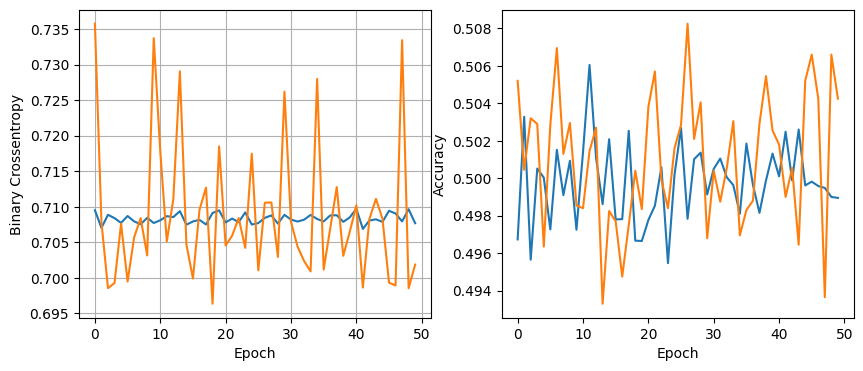

625/625 [==============================] - 0s 562us/step


In [100]:
nn_model,history = train_model(32,0.2,50,32,0.1)

plot_history(history)
y_pred = nn_model.predict(x_test)



In [101]:
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61     15095
           1       0.25      0.50      0.33      4905

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.63      0.50      0.54     20000



In [102]:
print(y_test)

y_pred = nn_model.predict(x_test)

print(y_pred)

[1 1 0 ... 0 0 1]
  1/625 [..............................] - ETA: 11s

625/625 [==============================] - 0s 551us/step
[[0.5635454 ]
 [0.41410092]
 [0.3925607 ]
 ...
 [0.4051108 ]
 [0.44803128]
 [0.44685957]]


In [116]:
print(x_train[0].shape)
print(x_train[0])

(6,)
[-0.52453615 -0.99110621  1.4048678  -0.10787117  0.94227012  0.36754461]
